# Explore here

In [1]:
# Your code here
2+2

4

In [3]:
url = 'https://storage.googleapis.com/datascience-materials/dogs-vs-cats.zip'

import requests
import zipfile
from io import BytesIO

extract_to_directory = "extracted_content" # Directory to extract files into

# Send GET request and wrap content in BytesIO
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as zfile:
    # Extract all files to a specified directory
    zfile.extractall(extract_to_directory)

print(f"Content extracted to '{extract_to_directory}' successfully.")

Content extracted to 'extracted_content' successfully.


## What we want is our directory to look something like this:
* extracted_content
    - dogs-vs-cats
        - train
            - cats
            - dogs
        - test
            - cats
            - dogs
        - val
            - cats
            - dogs



All the files have a similar naming scheme:
* cats.0.jpg
* dogs.151.jpg
* cats.####.jpg or dogs.####.jpg

In [4]:
25000 * 21

525000

In [6]:
#!pip install tensorflow

In [15]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
img_size = (112,112)
batch_size = 32

#create training, testing, and validation sets
train_ds = keras.utils.image_dataset_from_directory(
    "extracted_content/dogs-vs-cats/train/",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary",
    shuffle=True,
)

val_ds = keras.utils.image_dataset_from_directory(
    "extracted_content/dogs-vs-cats/val/",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary",
    shuffle=True,
)

test_ds = keras.utils.image_dataset_from_directory(
    "extracted_content/dogs-vs-cats/test/",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary",
    shuffle=True,
)

Found 20000 files belonging to 2 classes.
Found 2500 files belonging to 2 classes.
Found 2500 files belonging to 2 classes.


In [22]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

## Let's try copying directly from 4Geeks

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [24]:
# Load pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(112, 112, 3))
base_model.trainable = False  # Freeze weights

# Add new layers
model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
])

In [25]:
from tensorflow.keras.losses import BinaryCrossentropy

In [44]:
model.compile(optimizer = "adam", loss = BinaryCrossentropy(from_logits=False), metrics = ["accuracy"])

In [30]:
model.fit(test_ds, epochs=5, batch_size=16, validation_data=val_ds)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9160 - loss: 0.1940

/home/vscode/.local/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:1286: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


79/79 ━━━━━━━━━━━━━━━━━━━━ 485s 6s/step - accuracy: 0.9008 - loss: 0.2353 - val_accuracy: 0.8848 - val_loss: 0.2793
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 502s 6s/step - accuracy: 0.9536 - loss: 0.1217 - val_accuracy: 0.8992 - val_loss: 0.2857
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 484s 6s/step - accuracy: 0.9792 - loss: 0.0478 - val_accuracy: 0.9000 - val_loss: 0.3248
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 461s 6s/step - accuracy: 0.9940 - loss: 0.0210 - val_accuracy: 0.9084 - val_loss: 0.4232
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 543s 6s/step - accuracy: 0.9980 - loss: 0.0101 - val_accuracy: 0.9088 - val_loss: 0.4010


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 3, 3, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,484,933 (62.89 MB)

 Trainable params: 590,081 (2.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,180,164 (4.50 MB)

In [46]:
#train_ds_2 = train_ds.take(10)
#
#preds = model.predict(train_ds_2)
#preds.shape

(320, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


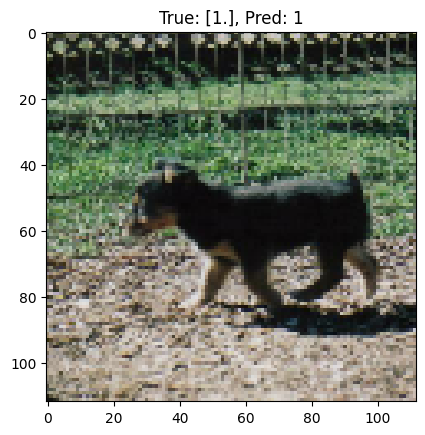

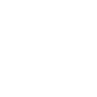

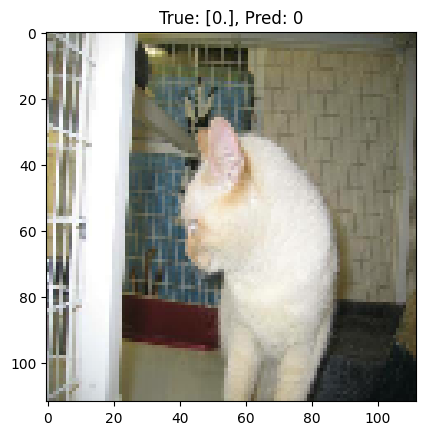

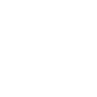

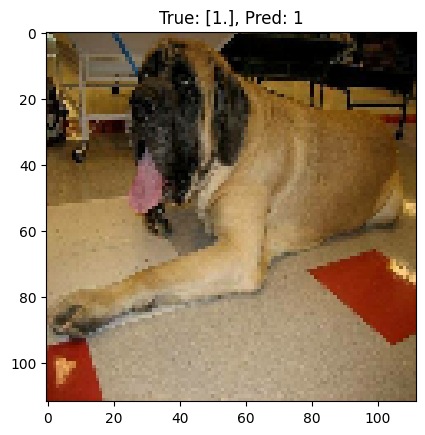

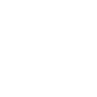

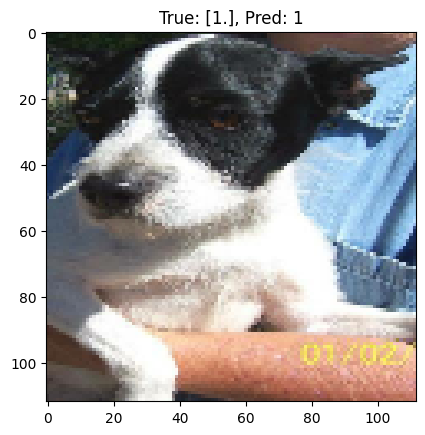

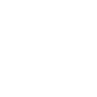

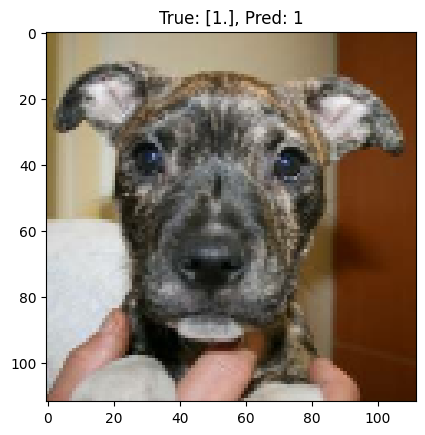

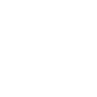

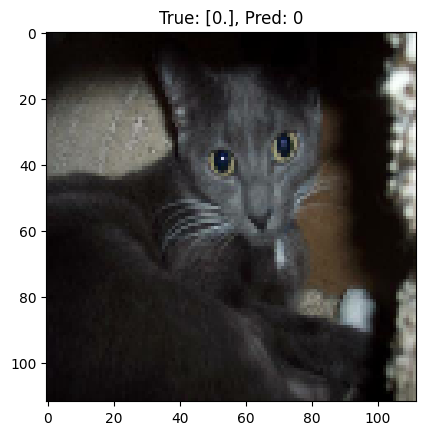

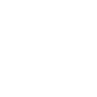

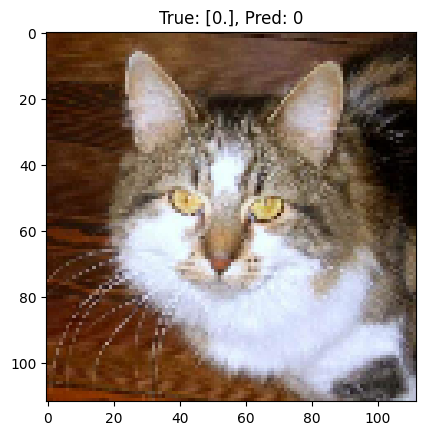

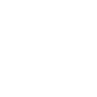

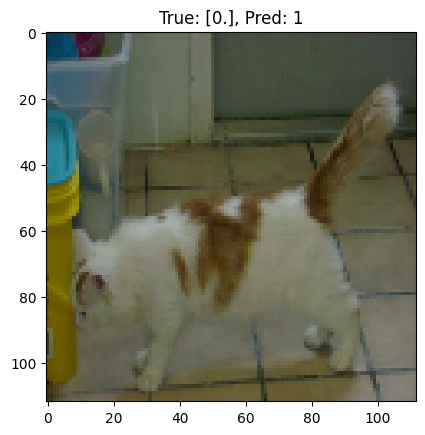

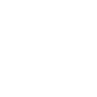

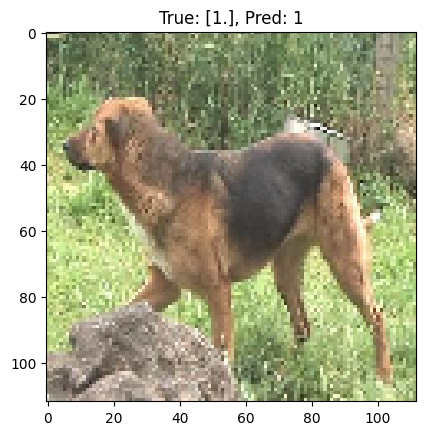

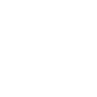

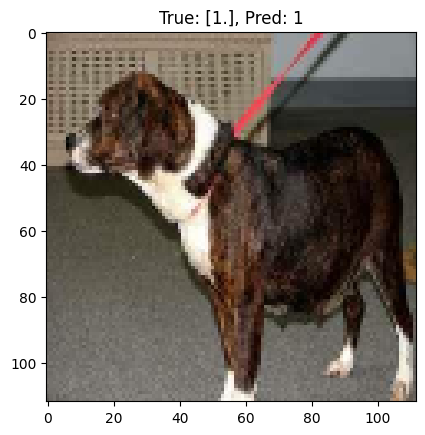

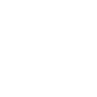

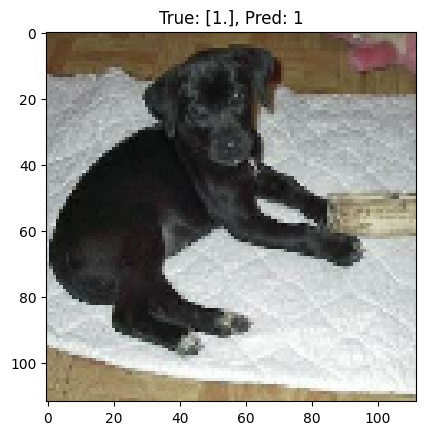

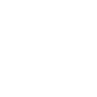

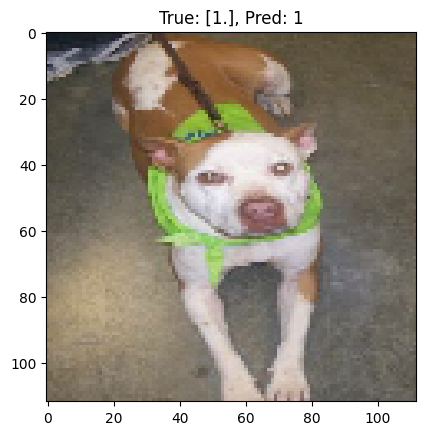

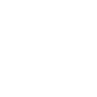

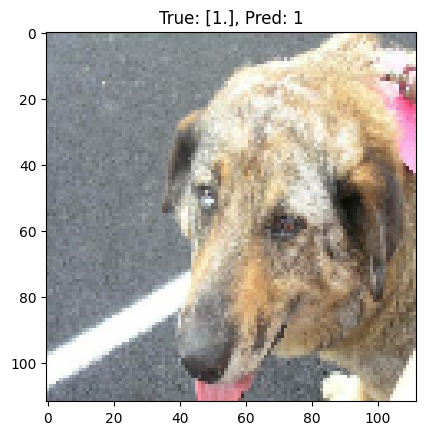

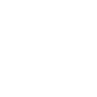

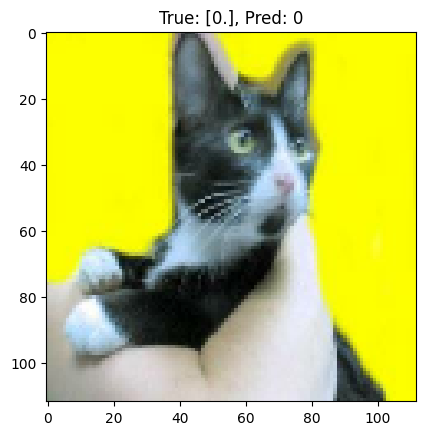

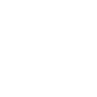

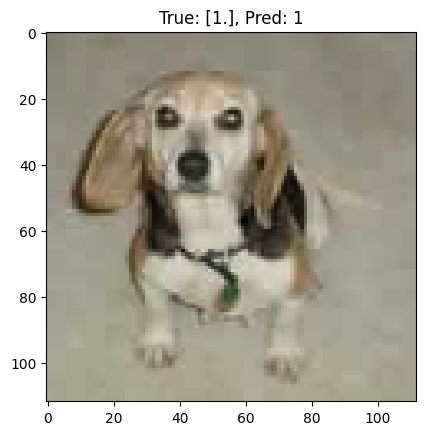

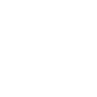

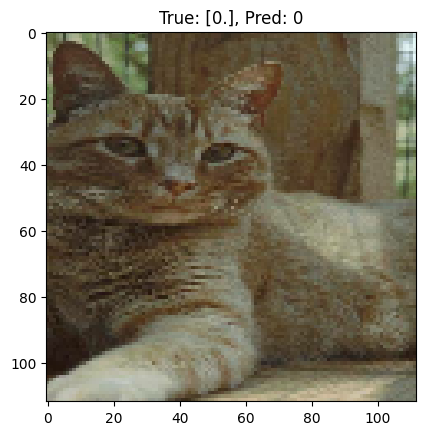

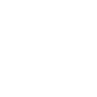

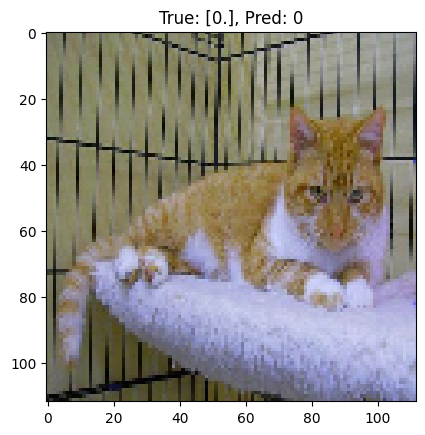

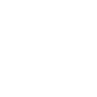

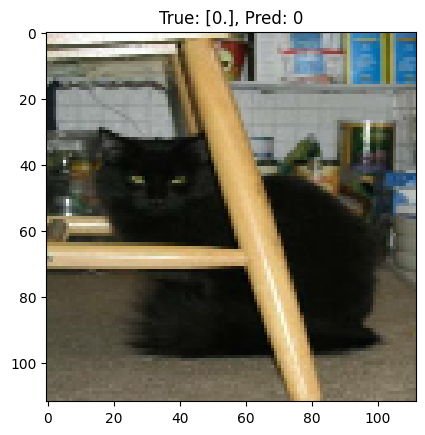

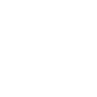

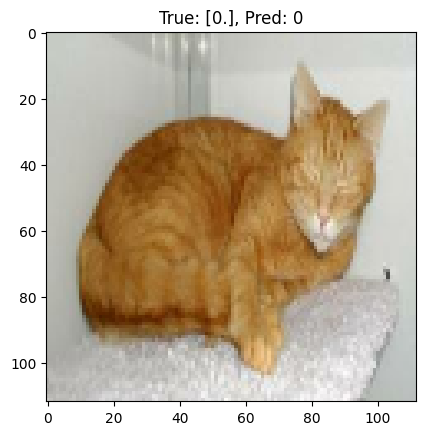

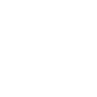

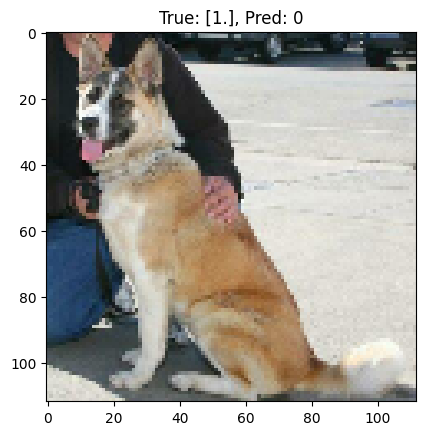

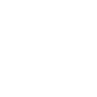

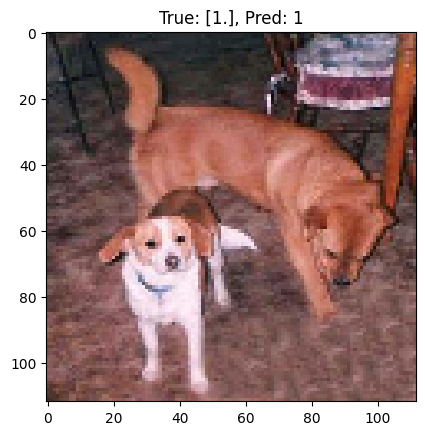

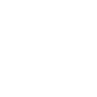

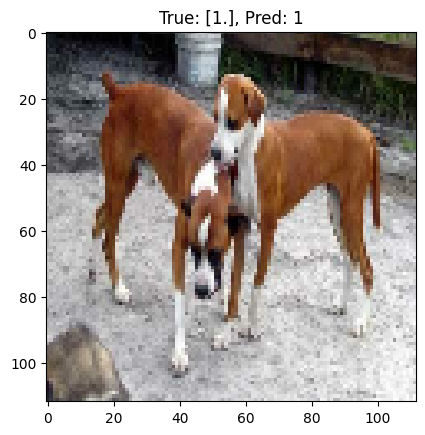

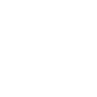

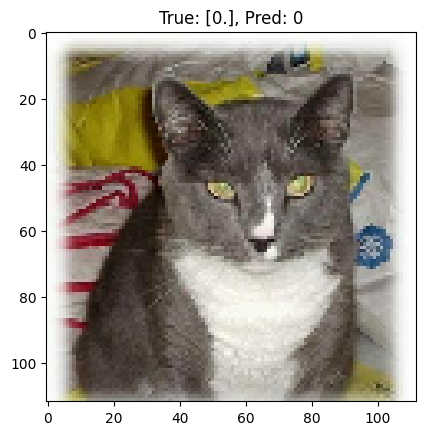

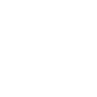

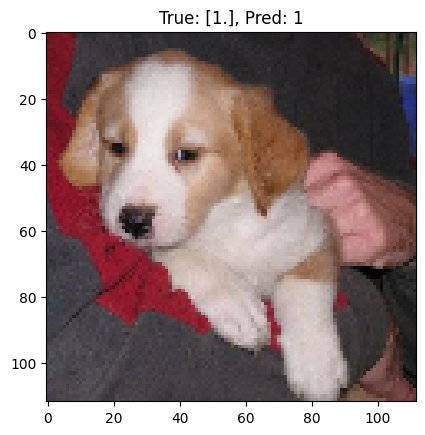

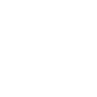

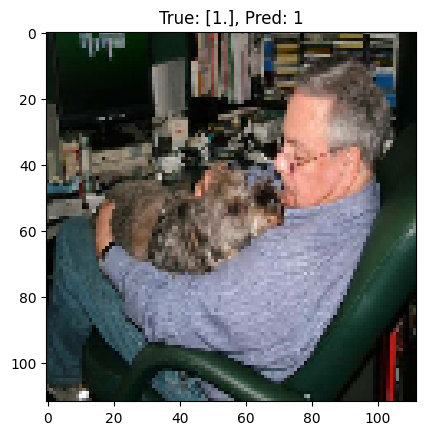

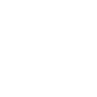

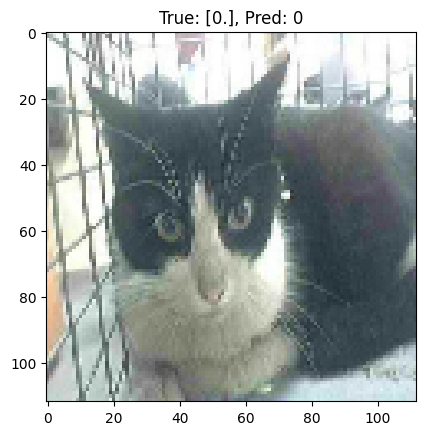

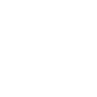

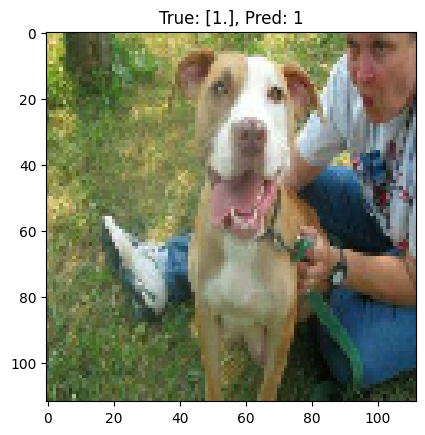

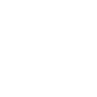

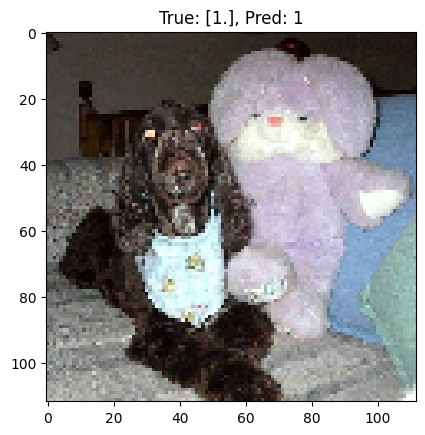

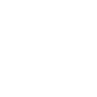

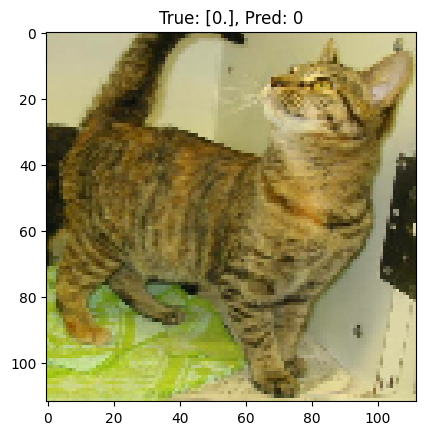

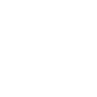

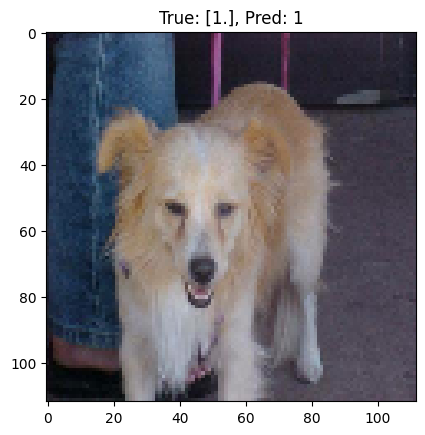

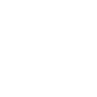

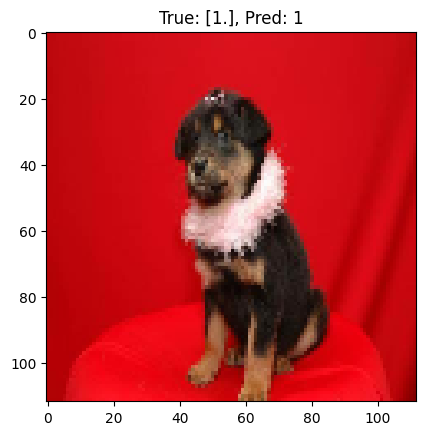

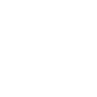

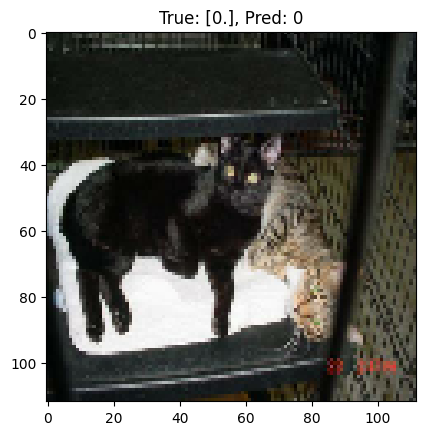

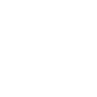

In [43]:
import matplotlib.pyplot as plt

for images, labels in train_ds_2.take(1): # add a batch size > 0 here to visualize output prediction (1 is optimal to get a quick example)
    preds_batch = model.predict(images)
    pred_labels_batch = (preds_batch > 0.5).astype(int)
    
    for i in range(len(images)):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"True: {labels[i].numpy()}, Pred: {pred_labels_batch[i][0]}")
        plt.figure(figsize=(1,1))
        plt.axis("off")
        plt.show()

## Confusion matrix methods

In [67]:
import numpy as np

In [69]:
y_pred = np.array([])
for images, y_true in train_ds_2.take(2): # add a batch size > 0 here to visualize output prediction (1 is optimal to get a quick example)
    preds_batch = model.predict(images)
    np.append(y_pred,np.array((preds_batch > 0.5).astype(int)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [70]:
y_pred.shape

(0,)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print(f"True negatives: {tn}")
print(f"True positives: {tp}")
print(f"False negatives: {fn}")
print(f"False positives: {fp}")

print(confusion_matrix(y_true, y_pred))

True negatives: 15
True positives: 16
False negatives: 0
False positives: 1
[[15  1]
 [ 0 16]]


In [63]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        16
         1.0       0.94      1.00      0.97        16

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32

